# Recap Statistics 1

In [1]:
# First, let's import all the needed libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import random


ModuleNotFoundError: No module named 'pandas'

In order to better understand the estimation of a population mean and the construction of a confidence interval, we will go through the procedure based on a data set. Therefore, we load the **students data set**. You may download the `students.csv` file [here](https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv) to your local file system or import it directly as a web resource. In either case, you import the data set to python as pandas dataframe object by using the `read_csv` method:

In [2]:
students = pd.read_csv(
    "https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv"
)
quant_vars = ["name", "age", "nc.score", "height", "weight"]

students_quant = students[quant_vars]
students_quant.head(10)

,name,age,nc.score,height,weight
1,"Gonzales, Christina",19,1.91,160,64.8
2,"Lozano, T'Hani",19,1.56,172,73.0
3,"Williams, Hanh",22,1.24,168,70.6
4,"Nem, Denzel",19,1.37,183,79.7
5,"Powell, Heather",21,1.46,175,71.4
6,"Perez, Jadrian",19,1.34,189,85.8
7,"Clardy, Anita",21,1.11,156,65.9
8,"Allen, Rebecca Marie",21,2.03,167,65.7
9,"Tracy, Robert",18,1.29,195,94.4
10,"Nimmons, Laura",18,1.19,165,66.0


## 1. Descriptive Statistics

### 1.1. Measures of Central Tendency

To gain intuition for any data set, it can be described by numerical summary measures.
There are three main measures of [**central tendency**](https://en.wikipedia.org/wiki/Central_tendency): the [**mean**](https://en.wikipedia.org/wiki/Arithmetic_mean ), the [**median**](https://en.wikipedia.org/wiki/Median) and the [**mode**](https://en.wikipedia.org/wiki/Mode_(statistics)).
However, there are other measures of central tendency too, such as the [**harmonic mean**](https://en.wikipedia.org/wiki/Harmonic_mean), the [**weighted mean**](https://en.wikipedia.org/wiki/Weighted_arithmetic_mean) and the [**geometric mean**](https://en.wikipedia.org/wiki/Geometric_mean). 

#### Arithmetic Mean 
The arithmetic mean is defined as follows: 

$$ \text{Mean} = \frac{\text{Sum of all values}}{\text{Number of all values}} \, . $$ 

The [**arithmetic mean**](https://en.wikipedia.org/wiki/Arithmetic_mean) calculated for sample data is denoted by $\bar x$ (read as "x bar") and the arithmetic mean for population data is denoted by $\mu$ (Greek letter *mu*).
Thus, the arithmetic mean can be calculated by the following equations:

$$ \bar x = \frac{1}{n}\sum_{i=1}^n x_i $$

In [3]:
students_heights = students_quant["height"]  # extract students_heights vector

students_heights_n = len(students_heights)  # get the length of the  vector,
# which is the number of observations
students_heights_sum = sum(students_heights)  # sum up the heights vector
students_heights_xbar = students_heights_sum / students_heights_n
print(
    f"The arithmetic mean of the students heights is: {round(students_heights_xbar,1)} cm."
)

The arithmetic mean of the students heights is: 171.4 cm.


Of course there is as well a function called [`mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) that is implemented in the [`NumPy`](https://numpy.org/doc/) library. 

In [4]:
np.mean(students_heights)

171.38075009103048


#### Median

Another very important measure of central tendency is the median . The median is the value of the middle term in a data set that has been ranked in increasing order. Thus, the median divides a ranked data set into two equal parts.

The calculation of the median consists of the following two steps:

Rank the data set in increasing order.
Find the middle term. The value of this term is the median.
Note that if the number of observations in a data set is odd, then the median is given by the value of the middle term in the ranked data. However, if the number of observations is even, then the median is given by the average of the values of the two middle terms (Mann 2012).

Let us evaluate the median for the height variable of the students data set.

In [5]:
np.median(students_heights)

171.0

#### The Geometric Mean

When studying phenomena such as inflation or population changes, which involve periodic increases or decreases (known as *rates of change*), the **geometric mean** is more appropriate to find the average change over the entire period under investigation.
To calculate the geometric mean of a sequence of $n$ values $x_1, x_2,..., x_n$, we multiply them and then find the $n^{th}$ root of this product:

$$ \bar x_{geo} = \sqrt[n]{x_1 \cdot x_2 \cdots x_n}\, , $$

which can be rewritten as

$$ \bar x_{geo} = \sqrt[n]{x_1 \cdot x_2 \cdots x_n} =\bigg(\prod_{i=1}^n x_i \bigg)^{1/n} = \sqrt[n]{\prod_{i=1}^n x_i} \, . $$

Let us make it clear by calculating an example:

We consider the annual growth rates of a swarm of honey bees over a 5-year period.
These rates of change are: 14 %, 26 %, 16 %, -38 %, -6 %.
Further, we know that at the beginning of the monitoring period there were 5,000 bees in the swarm.
We are looking for the mean rate of population change.

At first we set up our variables in python:

In [6]:
bees = np.array([14, 26, 16, -38, -6])  # rate of change in %

Now we apply, against better knowledge, the arithmetic mean:

In [7]:
bees_mean = np.mean(bees)
print(f"The mean rate of population change is: {round(bees_mean,1)} percent.")

The mean rate of population change is: 2.4 percent.


The arithmetic mean indicates that the swarm is growing over the period of five years!

Well, we are skeptical, thus we calculate the annual growth of the swarm of bees explicitly.
First, we transform the given percentages into relative growth rates (`bees_growth_rel`).
Then we simply calculate the state of the bee population after 5 years by sequentially multiplying the rates of change with the number of bees, which we know was 5,000 at the beginning of the survey.

In [8]:
bees_growth_rel = 1 + bees / 100  # annual rates of growth/decline
bees_growth_rel

round(
    5000
    * bees_growth_rel[0]
    * bees_growth_rel[1]
    * bees_growth_rel[2]
    * bees_growth_rel[3]
    * bees_growth_rel[4]
)

4855

Wow, what a surprise! Obviously, there is something wrong.
We expected the swarm to grow on average over time.
However, we calculated a decline in the absolute number of bees.

Let us try the geometric mean!

Please note that $\sqrt[n]{x} = x^{\frac{1}{n}}$.

To calculate the geometric mean explicitly we write:


In [9]:
bees_len = len(bees)  # number of observations

bees_growth_geom = (
    bees_growth_rel[0]
    * bees_growth_rel[1]
    * bees_growth_rel[2]
    * bees_growth_rel[3]
    * bees_growth_rel[4]
) ** (1 / bees_len)

In [10]:
# rounded result
round(bees_growth_geom, 3)

0.994

Great! The geometric mean indicates that there is a decline in the number of species over time at an average rate of 0.994, which corresponds to -0.006%.

We check that by taking 5,000 bees (the initial number of bees in the swarm) times 0.994 for each year; thus, resulting in 4971 bees after the first year, 4942 after the second year, 4913 after the third year, 4884 after the fourth year and 4855 after the fifth year of observation.

A perfect match! In contrast to the arithmetic mean, the geometric mean does not over-state the year-to-year growth!

Unfortunately, there is no in-built function for the geometric mean in the Python Standard Library.
Thus, we install the [`scipy`](https://docs.python.org/3/library/statistics.html) library by calling `pip install scipy` and then importing the `stats` module within the`scipy` library by calling `import scipy.stats`.
Then, we can access the `gmean()` function.

In [11]:
round(stats.gmean(bees_growth_rel), 3)

0.994

### 1.2. Measures of Dispersion

The measures of central tendency, such as the mean, median and mode, do not reveal the whole picture of the distribution of a data set.
Two data sets with the same mean may have completely different spreads.
The variation among the values of observations for one data set may be much larger or smaller than for another data set.
Thus, the mean, median or mode by itself is usually not a sufficient measure to reveal the shape of the distribution of a data set.
We also need a measure that can provide some information about the variation among data values.
These measures are called the **measures of dispersion**.
The measures of central tendency and dispersion taken together give a better picture of a data set than the measures of central tendency alone (Mann 2012).



<div>
<img src="figures/variance_depiction.png" width="700"/>
</div>


The [**variance**](https://en.wikipedia.org/wiki/Variance) is the mean squared deviation from the mean.
The variance for population data is denoted by $\sigma^2$ (read as *sigma squared*) and the variance calculated for sample data is denoted by $s^2$. Mathematically it is given by:

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\mu)^2}{N}\, , $$

respectively

$$ s^2 = \frac{\sum_{i=1}^n (x_i-\bar x)^2}{n-1}\, , $$

where $\sigma^2$ is called the population variance and $s^2$ is the sample variance.
The quantity $x_i-\mu$, respectively $x_i-\bar x$, in the above formulas is called the deviation of the $x_i$ value ($x_1, x_2,...,x_n$) from the mean (Mann 2012).

The [**standard deviation**](https://en.wikipedia.org/wiki/Standard_deviation) is the most-used measure of dispersion.
The value of the standard deviation tells us how closely the values of a data set are clustered around the mean.
In general, a lower value of the standard deviation indicates that the values of the data set are spread over a relatively smaller range around the mean.
In contrast, a larger value of the standard deviation for a data set indicates that the values of that data set are spread over a relatively larger range around the mean ([Mann 2012](https://archive.org/details/IntroductoryStatistics7thEdP.MannWiley2010WW)).

The **standard deviation** is obtained by taking the square root of the **variance**.
Consequently, the standard deviation calculated for population data is denoted by $\sigma$ and the standard deviation calculated for sample data is denoted by $s$.  

$$ \sigma = \sqrt{\frac{\sum_{i=1}^N (x_i-\mu)^2}{N}} $$

and

$$ s = \sqrt{\frac{\sum_{i=1}^n (x_i-\bar x)^2}{n-1}} $$

where $\sigma$ is the standard deviation of the population and $s$ is the standard deviation of the sample.



In [12]:
# mean
students_quant_mean = students_quant.loc[:, students_quant.columns != "name"].apply(
    np.mean
)
# median
students_quant_median = students_quant.loc[:, students_quant.columns != "name"].apply(
    np.median
)
# variance
students_quant_var = students_quant.loc[:, students_quant.columns != "name"].apply(
    np.var
)
# standard deviation
students_quant_sd = students_quant.loc[:, students_quant.columns != "name"].apply(
    np.std
)
# concatenate the vectors and round to 2 digits
students_quant_stats = pd.concat(
    [students_quant_mean, students_quant_median, students_quant_var, students_quant_sd],
    axis=1,
).round(2)
# # rename column names
students_quant_stats.columns = ["mean", "median", "variance", "standard deviation"]
students_quant_stats

,mean,median,variance,standard deviation
age,22.54,21.00,36.78,6.06
nc.score,2.17,2.04,0.66,0.81
height,171.38,171.00,122.70,11.08
weight,73.00,71.80,74.56,8.63


#### Boxplots

In data analysis the identification of **outliers**, meaning observations that fall well outside the overall pattern of the data, is very important. An outlier requires special attention. It may be the result of a measurement or recording error, an observation from a different population or an unusual extreme observation. Note that an extreme observation does not need to be an outlier; it can instead be an indication of skewness (Weiss 2010).

If we observe an outlier, we should try to determine its cause. If an outlier is caused by a measurement or recording error or if for some other reason it clearly does not belong to the data set, the outlier can simply be removed. However, if no explanation for an outlier is apparent, the decision whether to retain it in the data set is a difficult judgment call.

As a diagnostic tool for spotting observations that may be outliers we may use quartiles and the 
$IQR$. For this we define the lower limit and the upper limit of a data set. The lower limit is the number that lies $1.5×IQRs$
 below the first quartile; the upper limit is the number that lies $1.5×IQRs$
 above the third quartile. Observations that lie below the lower limit or above the upper limit are potential outliers (Weiss 2010).

$$ \text{Lower limit} = Q1 - 1.5 \times IQR $$

$$\text{Upper limit} = Q3 + 1.5 \times IQR
$$

A **boxplot**, also called a **box-and-whisker diagram,** is based on the five-number summary and can be used to provide a graphical display of the center and variation of a data set. These diagrams were invented by the mathematician John Wilder Tukey. Several types of boxplots are in common use.

Box-and-whisker plots give a graphic representation of data using five measures: the median, the first quartile, the third quartile as well as the smallest and the largest value between the lower and the upper limits of the data set. The spacing between the different parts of the box indicates the degree of dispersion (spread) and skewness in the data. We can compare different distributions by making box-and-whisker plots for each of them. It also helps to detect outliers (Mann 2012). Box plots can be drawn either horizontally or vertically.

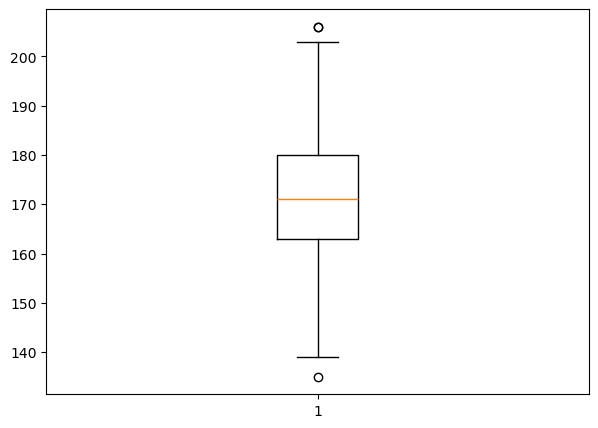

In [13]:
fig = plt.figure(figsize=(7, 5))
plt.boxplot(students_heights)
plt.show()

## 2. Continous Random Variables

### 2.1. Normal Distribution 

The [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution) is used extensively in probability theory, statistics, and the natural and social sciences. It is also called the **Gaussian distribution**, because [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) (1777-1855) was one of the first to apply it for the analysis of astronomical data ([Lovric 2011](https://doi.org/10.1007/978-3-642-04898-2)).

The **normal probability distribution** or the **normal curve** is a bell-shaped (symmetric) curve. Its mean is denoted by $\mu$ and its standard deviation by $\sigma$. A continuous random variable $x$ that has a normal distribution is called a **normal random variable**. 

The notation for a normal distribution is $X \sim N(\mu,\sigma)$. The probability density function (PDF) is written as 

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

where $e \approx 2.7182818$ and $\pi \approx 3.14159$. The probability density function $f(x)$ gives the vertical distance between the horizontal axis and the normal curve at point $x$. 

The normal distribution is described by two parameters, the mean, $\mu$, and the standard deviation, $\sigma$. Each different set of values of $\mu$ and $\sigma$ gives a different normal distribution. The value of $\mu$ determines the center of a normal distribution curve on the horizontal axis, and the value of $\sigma$ gives the spread of the normal distribution curve. 
<div>
<img src="figures/NVT_mu.png" width="700"/>
</div>
<div>
<img src="figures/NVT_sigma.png" width="700"/>
</div>

#### Summary Properties of the normal distribution:
* unimodal bell-shaped theoretical distribution 
* Maximum value of the density is at x=μ
* NVT(μ,σ)is symmetrical to:
    * For all x, f(μ -x)=f(μ +x)
      
* because of the symmetry, the skewness of the NVT is always = 0 
* The NVT is unconstrained on both sides, i.e. its left or right distribution branch
distribution branch converges for x towards - ∞ or + ∞ towards f(x) = 0

* Parameter μ determines the position of the NVT(μ,σ)on the x-axis 

* Parameter σ defines the spread of the NVT(μ,σ)
* 3-sigma rule:

| amount of x-values |  Interval | 
|---|---|
| 50%   |  μ± 0.675 · σ |  
| 68%   |  μ± 1 · σ |  
| 95.4%   |  μ± 2· σ |   
|  99.7% |  μ± 3 · σ |  



#### Central Limit Theorem
> A [nice visualisation](https://www.statcrunch.com/applets/type3&samplingdist) of the central limit theorem!

> **Some nice videos about the [normal distribution ](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Continous-Random-Variables/The-Normal-Distribution/index.html) and [central limit theorem](https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Central-Limit-Theorem/Intro-Video/index.html).**

**Problem:**
1. i usually do not know the mean value of the population!
2. every time I draw a sample I get a different mean value!

How can I determine the error between the sample mean and the unknown mean of the population?

>**Answer:** With the help of the central limit theorem!

**Concept**: How do you conclude the population mean from the sample mean?
- Population mean $\mu$ is generally unknown
    - we estimate $\mu$ by taking samples and calculating the sample mean
    -  difference of these two is called **sampling error**
- population mean and sample mean become more and more similar --> Approximation
- standard deviation can also be estimated in this way
- different literature data: this approximation is sufficiently good for n = 30 (or more than 30)



### 2.2. Example

First, we will reuse the students data set `students.csv` from before and take a look at the shape.

In [14]:
count_row = students.shape[0]  # number of rows
count_col = students.shape[1]  # number of columns
column_names = students.columns  # column name

We use the height variable to exercise what we have discussed so far.

First, we want to assure that we are dealing with normally distributed data. If a variable is normally distributed, then, for a large sample, a histogram of the observations should be roughly bell shaped.

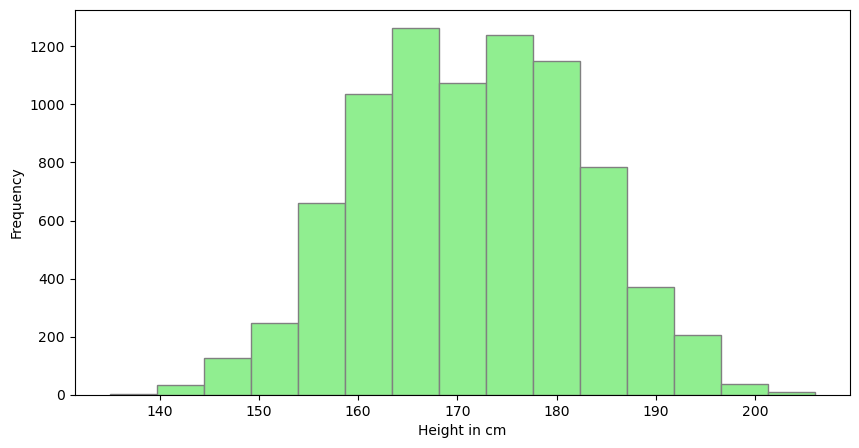

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(students["height"], bins="sturges", color="lightgreen", edgecolor="grey")
plt.xlabel("Height in cm")
plt.ylabel("Frequency")
plt.show()

By inspecting the plot we may conclude that the height variable is normally distributed, however, especially for small samples, ascertaining a clear shape in a histogram and, in particular, whether it is bell shaped is often difficult. Thus, a more sensitive graphical technique is required for assessing normality. Normal probability plots provide such a technique. The idea behind a normal probability plot is simple: Compare the observed values of the variable to the observations expected for a normally distributed variable. More precisely, a normal probability plot is a plot of the observed values of the variable versus the normal scores of the observations expected for a variable having the standard normal distribution. If the variable is normally distributed, the normal probability plot should be roughly linear (i.e., fall roughly in a straight line) (Weiss 2010).

When using a normal probability plot to assess the normality of a variable, we must remember two things:

The decision of whether a normal probability plot is roughly linear is a subjective one, and
that we are using only a limited number of observations of that particular variable to make a judgment about all possible observations of the variable.
In Python we may employ the statsmodels.api library, which provides a function for plotting normal probability plots often referred to as Q-Q plots. For plotting a complete Q-Q-Plot, we make use of the qqplot function.

<Figure size 1200x500 with 0 Axes>

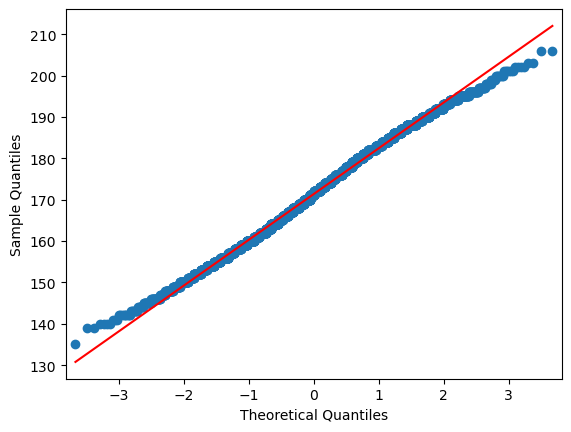

In [16]:
import statsmodels.api as sm

plt.figure(figsize=(12, 5))
sm.qqplot(students["height"], line="r")

plt.show()

By inspecting the plot we see that there is some divergence for the sample quantiles compared to the theoretic quantiles at the lower and upper tails. This fact needs a little more attention! What might be the reason for the departure at the upper and lower tail of the distribution? Any guess?

What about gender? Honestly, it is seems natural that the mean height for males and females differs. Let us plot a histogram of the height of males and females.

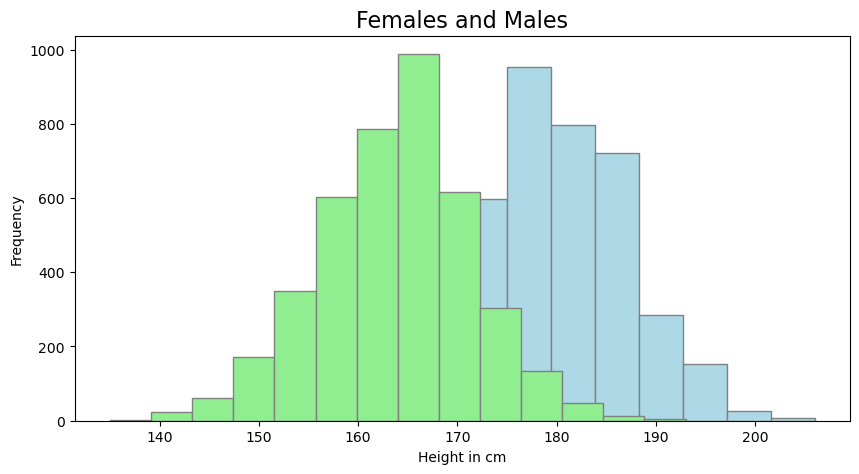

In [17]:
## subset by gender
males = students.loc[students["gender"] == "Male"]
females = students.loc[students["gender"] == "Female"]

## plot by gender
plt.figure(figsize=(10, 5))
plt.hist(males["height"], bins="sturges", color="lightblue", edgecolor="grey")
plt.hist(females["height"], bins="sturges", color="lightgreen", edgecolor="grey")
plt.xlabel("Height in cm")
plt.ylabel("Frequency")
plt.title("Females and Males", fontsize=16)
plt.show()

There it is! Obviously, the two groups have different means, and thus, putting them together into one group causes the left an right tails of the resulting distribution to extend further, than expected for a normally distributed variable. In order to continue, we thus take only the height of female students into considerations. For the matter of clarity we once again plot the normal probability plot of the height variable to assure that our target variables are normally distributed.

<Figure size 1200x500 with 0 Axes>

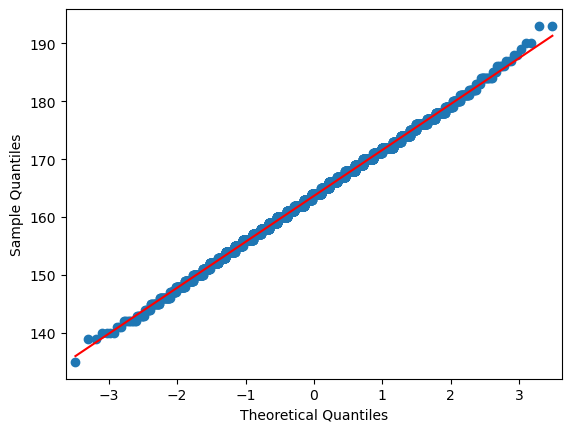

In [18]:
plt.figure(figsize=(12, 5))
sm.qqplot(females["height"], line="r")

plt.show()

### Shapiro-Wilk test for Normality

In [19]:
## perform shapiro-wilk test for normality
# input = array, output: The test statistic & p-value
# Ho(Accepted): Sample is from the normal distributions.(P>0.05)
# Ha(Rejected): Sample is not from the normal distributions.
students_height_sample= random.sample(list(students["height"].values), 500)

_,pvalue = stats.shapiro(students_height_sample)



In [20]:
## Evaluate p-value with if condition

alpha = 0.05

def eval_p(pvalue):
    if pvalue <= alpha:
        print("Reject Ho: not normally distributed")
    else: 
        print("Accept H0: Normally distributed")

eval_p(pvalue)

Accept H0: Normally distributed


In [21]:
females_height_sample= random.sample(list(females["height"].values), 500)


In [22]:
## perform normality test on females only:
_,pvalue = stats.shapiro(females_height_sample)
eval_p(pvalue)

Accept H0: Normally distributed


#### How to check if two subpopulations are significantly different using Boxplots?

We switch to the seaborn package for plotting boxplots, since it allows for a easy handling of grouped boxplots. We introduce the notch argument. If the notches of two plots do not overlap this is "strong evidence" that the two medians differ (Chambers, et al. (1983): Graphical Methods for Data Analysis. Wadsworth & Brooks/Cole, p. 62).


<Axes: xlabel='gender', ylabel='height'>

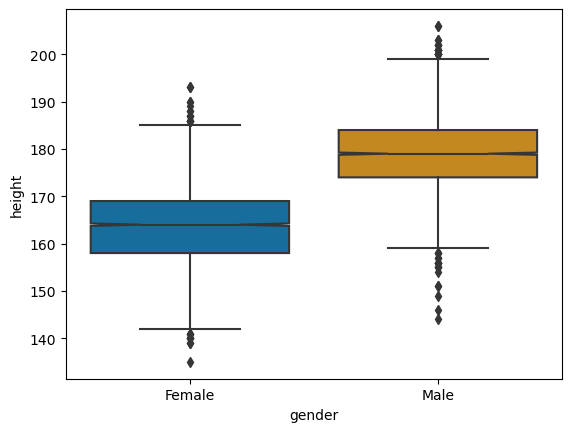

In [23]:
sns.boxplot(y="height", x="gender", data=students, palette="colorblind", notch=True)

Obviously, and certainly not that unexpectedly, there is a difference in the height of the students among the different groups (male or female). Female students tend to be smaller than male students, but, if we look at the extremes, there are tall and short individuals in both groups. However, as mentioned above, we will have to test our observations for statistical significance to be more confident, that the observed difference in height is not just there by chance.

In [24]:
## How about other variables?

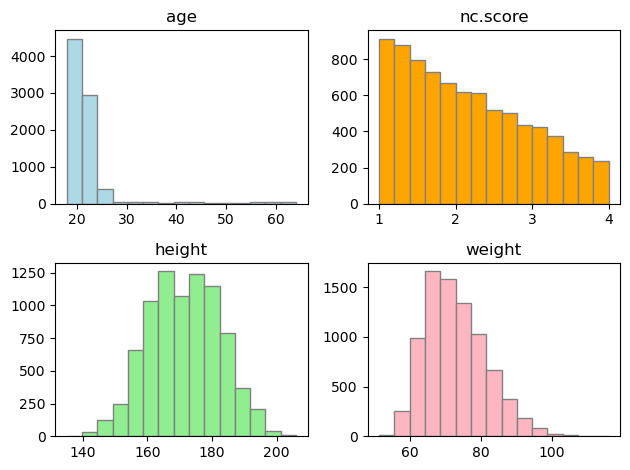

In [25]:
fig, axs = plt.subplots(2, 2)



axs[0, 0].hist(students_quant["age"], bins="sturges", color="lightblue", edgecolor="grey")
axs[0, 0].set_title('age')
axs[0, 1].hist(students_quant["nc.score"], bins="sturges", color="orange", edgecolor="grey")
axs[0, 1].set_title('nc.score')
axs[1, 0].hist(students_quant["height"], bins="sturges", color="lightgreen", edgecolor="grey")
axs[1, 0].set_title('height')
axs[1, 1].hist(students_quant["weight"], bins="sturges", color="lightpink", edgecolor="grey")
axs[1, 1].set_title('weight')

#for ax in axs.flat:
 #   ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
plt.tight_layout()
plt.show()

In [26]:
import urllib.request

fp = urllib.request.urlopen("https://userpage.fu-berlin.de/soga/soga-py/citation/citation_py.html")
mybytes = fp.read()

citation = mybytes.decode("utf8")
fp.close()

from IPython.display import display, HTML
display(HTML(citation))